In [12]:
import numpy as np
import torch
import concurrent.futures
import multiprocessing as mp
import numpy as np

from comparison import comparison

In [5]:
iterations = 4

if __name__ == '__main__':
  
    SEEDS = np.linspace(1, iterations, iterations, dtype=int).tolist()

    error_list_fedavg = []
    score_list_fedavg = []
    error_list_fedreg = []
    score_list_fedreg = []
    error_list_fedreg_dist = []
    score_list_fedreg_dist = []

    with concurrent.futures.ProcessPoolExecutor(max_workers=mp.cpu_count(), mp_context=mp.get_context("spawn")) as executor:
            for e_avg, s_avg, e_reg, s_reg, e_reg_d, s_reg_d in executor.map(comparison, SEEDS):
                error_list_fedavg.append(e_avg)
                score_list_fedavg.append(s_avg)
                error_list_fedreg.append(e_reg)
                score_list_fedreg.append(s_reg)
                error_list_fedreg_dist.append(e_reg_d)
                score_list_fedreg_dist.append(s_reg_d)

In [7]:
err = []
err_std = []
for i in range(0, len(error_list_fedavg[0])):
    s = 0
    e = []
    for k in error_list_fedavg:
        s += k[i]
        e.append(k[i])
    err.append(s / len(error_list_fedavg))
    err_std.append(np.std(e))

sc = []
sc_std = []
for i in range(0, len(score_list_fedavg[0])):
    s = 0
    e = []
    for k in score_list_fedavg:
        s += k[i]
        e.append(k[i])
    sc.append(s / len(score_list_fedavg))
    sc_std.append(np.std(e))

    
    
    
    
    
    
    
err_s = []
err_s_std = []
for i in range(0, len(error_list_fedreg[0])):
    s = 0
    e = []
    for k in error_list_fedreg:
        s += k[i]
        e.append(k[i])
    err_s.append(s / len(error_list_fedreg))
    err_s_std.append(np.std(e))

sc_s = []
sc_s_std = []
for i in range(0, len(score_list_fedreg[0])):
    s = 0
    e = []
    for k in score_list_fedreg:
        s += k[i]
        e.append(k[i])
    sc_s.append(s / len(score_list_fedreg))
    sc_s_std.append(np.std(e))
    
    
    
    
    
    
    
err_s_d = []
err_s_d_std = []
for i in range(0, len(error_list_fedreg_dist[0])):
    s = 0
    e = []
    for k in error_list_fedreg_dist:
        s += k[i]
        e.append(k[i])
    err_s_d.append(s / len(error_list_fedreg_dist))
    err_s_d_std.append(np.std(e))

sc_s_d = []
sc_s_d_std = []
for i in range(0, len(score_list_fedreg_dist[0])):
    s = 0
    e = []
    for k in score_list_fedreg_dist:
        s += k[i]
        e.append(k[i])
    sc_s_d.append(s / len(score_list_fedreg_dist))
    sc_s_d_std.append(np.std(e))

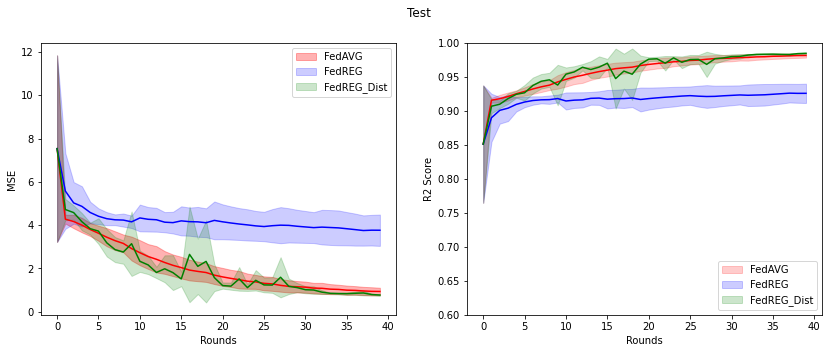

In [11]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib.ticker import MaxNLocator

#plt.figure(figsize=(20,5))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))
fig.suptitle("Test")


x = np.arange(len(error_list_fedavg[0]))

ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
ax2.xaxis.set_major_locator(MaxNLocator(integer=True))


ax1.fill_between(x, np.array(err)+np.array(err_std), np.array(err)-np.array(err_std), color='red', label='FedAVG', alpha=0.3)
ax1.fill_between(x, np.array(err_s)+np.array(err_s_std), np.array(err_s)-np.array(err_s_std), color='blue', label='FedREG', alpha=0.2)
ax1.fill_between(x, np.array(err_s_d)+np.array(err_s_d_std), np.array(err_s_d)-np.array(err_s_d_std), color='green', label='FedREG_Dist', alpha=0.2)
ax1.plot(x, err, color='red')
ax1.plot(x, err_s, color='blue')
ax1.plot(x, err_s_d, color='green')

ax1.legend(loc='upper right')

ax1.set_xlabel("Rounds")
ax1.set_ylabel("MSE")


#ax1.set_ylim(ymin=0, ymax=5)


ax2.fill_between(x, np.array(sc)+np.array(sc_std), np.array(sc)-np.array(sc_std), color='red', label='FedAVG', alpha=0.2)
ax2.fill_between(x, np.array(sc_s)+np.array(sc_s_std), np.array(sc_s)-np.array(sc_s_std), color='blue', label='FedREG', alpha=0.2)
ax2.fill_between(x, np.array(sc_s_d)+np.array(sc_s_d_std), np.array(sc_s_d)-np.array(sc_s_d_std), color='green', label='FedREG_Dist', alpha=0.2)
ax2.plot(x, sc, color='red')
ax2.plot(x, sc_s, color='blue')
ax2.plot(x, sc_s_d, color='green')
ax2.legend(loc='lower right')

ax2.set_xlabel("Rounds")
ax2.set_ylabel("R2 Score")
ax2.set_ylim(ymin=0.6, ymax=1)




plt.draw()